## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [5]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [29]:
df = pd.read_csv('tips.csv')

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['sex', 'smoker', 'day', 'time']
Numerical columns: ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [7]:
average_bill_by_day = df.groupby('day')['total_bill'].mean().sort_values(ascending=False)
print(average_bill_by_day)

day
Sun     21.410000
Sat     20.441379
Thur    17.682742
Fri     17.151579
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [8]:
average_tip_by_gender = df.groupby('sex')['tip'].mean()
print(average_tip_by_gender)

more_generous_gender = average_tip_by_gender.idxmax()
print(f"The more generous gender in giving tips is: {more_generous_gender}")

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
The more generous gender in giving tips is: Male


### 4. According to the data, were there more customers for dinner or lunch?

In [9]:
customers_by_time = df['time'].value_counts()
print(customers_by_time)

more_customers = customers_by_time.idxmax()
print(f"There were more customers for: {more_customers}")

time
Dinner    176
Lunch      68
Name: count, dtype: int64
There were more customers for: Dinner


### 5. Based on the statistical summary, comment on the variable 'tip'

In [31]:
tip_summary = df['tip'].describe()
print(tip_summary)

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [11]:
busiest_day = df['day'].value_counts().idxmax()
print(f"The busiest day in terms of orders is: {busiest_day}")

The busiest day in terms of orders is: Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

Skewness of total_bill: 1.1262346334818638


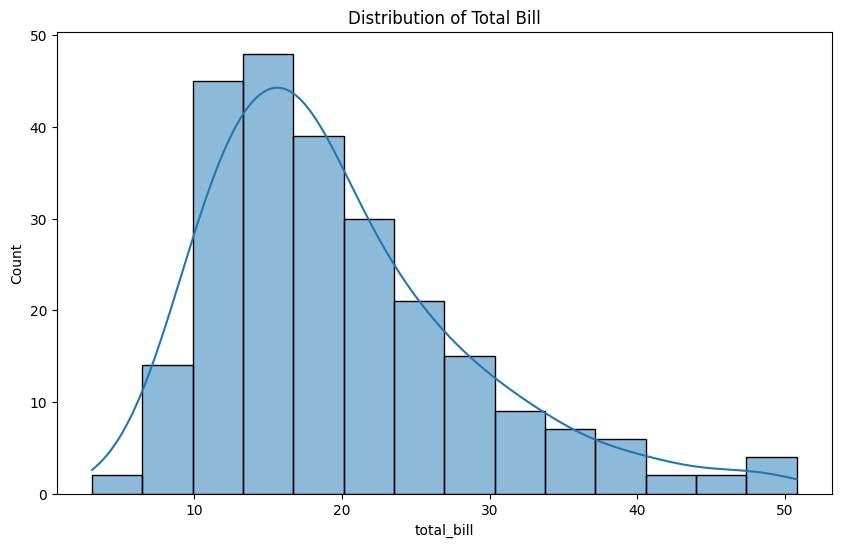

The total_bill variable is positively skewed (right-skewed).


In [32]:
skewness = skew(df['total_bill'])
print(f"Skewness of total_bill: {skewness}")

plt.figure(figsize=(10, 6))
sns.histplot(df['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.show()

if skewness > 0:
    print("The total_bill variable is positively skewed (right-skewed).")
elif skewness < 0:
    print("The total_bill variable is negatively skewed (left-skewed).")
else:
    print("The total_bill variable is approximately symmetric.")

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

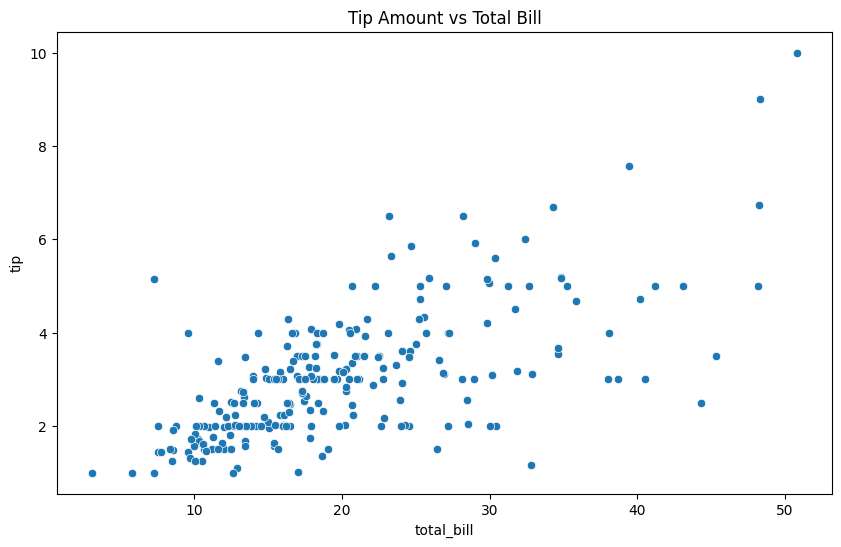

Correlation between total_bill and tip: 0.6757341092113645


In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Tip Amount vs Total Bill')
plt.show()

correlation = df['total_bill'].corr(df['tip'])
print(f"Correlation between total_bill and tip: {correlation}")

### 9. What is the percentage of males and females in the dataset? and display it in the plot

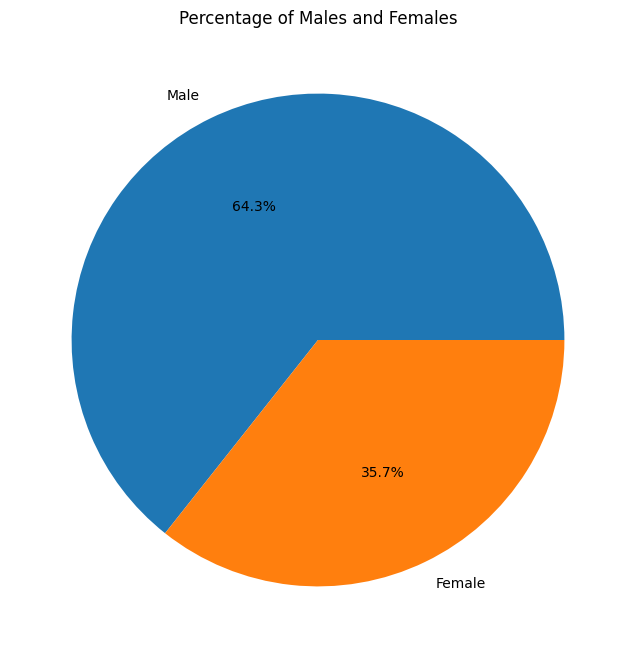

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


In [14]:
gender_percentages = df['sex'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Males and Females')
plt.show()

print(gender_percentages)

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

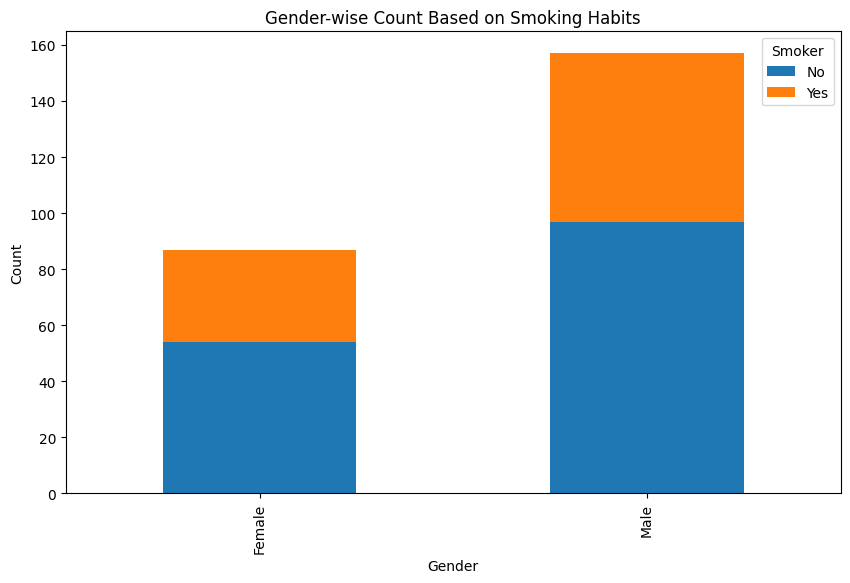

smoker  No  Yes
sex            
Female  54   33
Male    97   60


In [15]:
gender_smoking = df.groupby(['sex', 'smoker']).size().unstack()

gender_smoking.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender-wise Count Based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

print(gender_smoking)

### 11. Compute the average tip amount given for different days and display it in the plot.

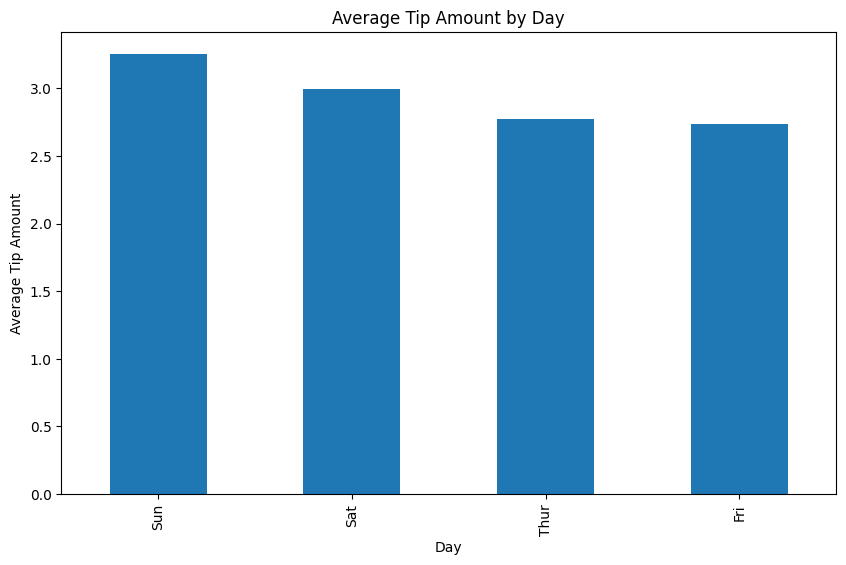

day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64


In [16]:
average_tip_by_day = df.groupby('day')['tip'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_tip_by_day.plot(kind='bar')
plt.title('Average Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.show()

print(average_tip_by_day)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

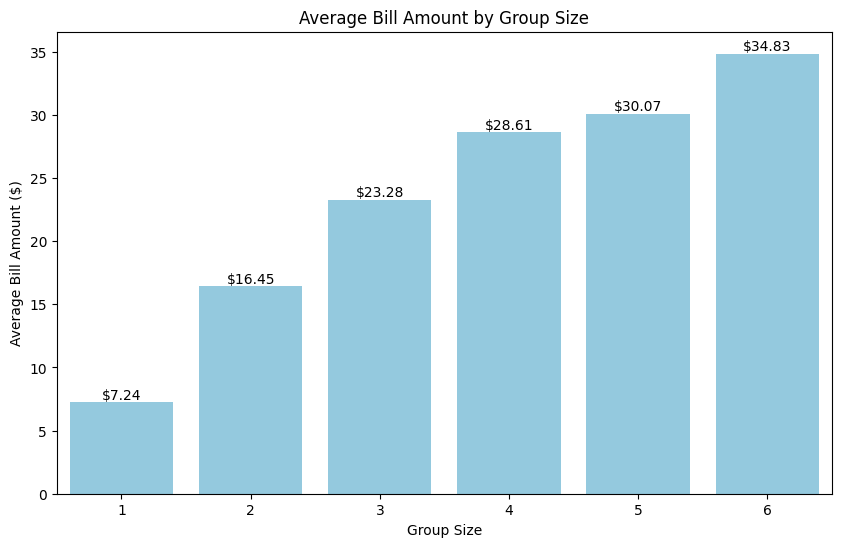

Correlation between group size and total bill: 0.5983

Average bill amounts by group size:
 size  total_bill
    1    7.242500
    2   16.448013
    3   23.277632
    4   28.613514
    5   30.068000
    6   34.830000


In [34]:
average_bill_by_size = df.groupby('size')['total_bill'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='total_bill', data=average_bill_by_size, color='skyblue')
plt.title('Average Bill Amount by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Bill Amount ($)')

for i, row in average_bill_by_size.iterrows():
    plt.text(i, row['total_bill'], f'${row["total_bill"]:.2f}', 
             ha='center', va='bottom')

plt.show()

correlation = df['size'].corr(df['total_bill'])
print(f"Correlation between group size and total bill: {correlation:.4f}")

print("\nAverage bill amounts by group size:")
print(average_bill_by_size.to_string(index=False))

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

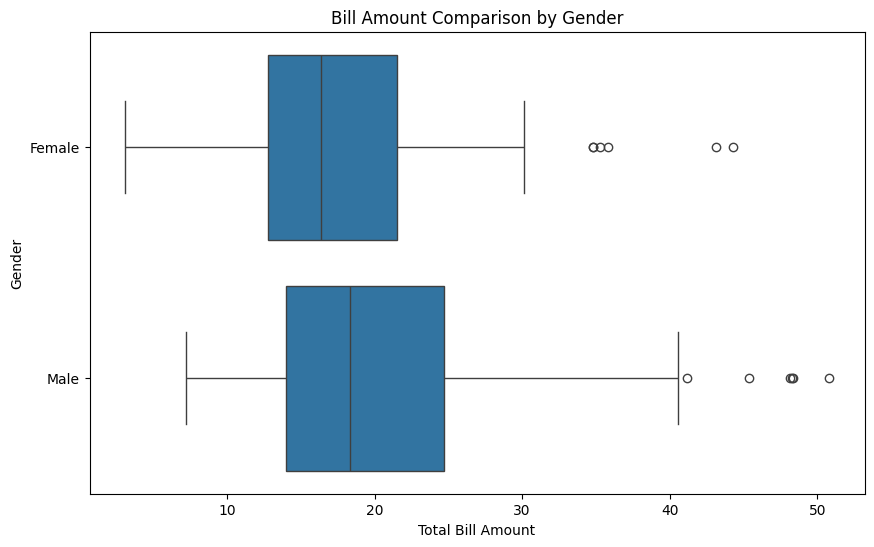

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_bill', y='sex', data=df, orient='h')
plt.title('Bill Amount Comparison by Gender')
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [19]:
weekend_max_bills = df[(df['day'].isin(['Sat', 'Sun']))].groupby(['day', 'time'])['total_bill'].max().unstack()
print(weekend_max_bills)

time  Dinner
day         
Sat    50.81
Sun    48.17


### 15. Compute the percentage of missing values in the dataset.

In [28]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

total_bill        0.0
tip               0.0
sex               0.0
smoker            0.0
day               0.0
time              0.0
size              0.0
bill_range        0.0
bill_bin          0.0
tip_percentage    0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [35]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

if duplicate_count > 0:
    df_no_duplicates = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df_no_duplicates.shape}")
else:
    print("No duplicate records found.")

Number of duplicate records: 1
Dataset shape after removing duplicates: (243, 7)


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

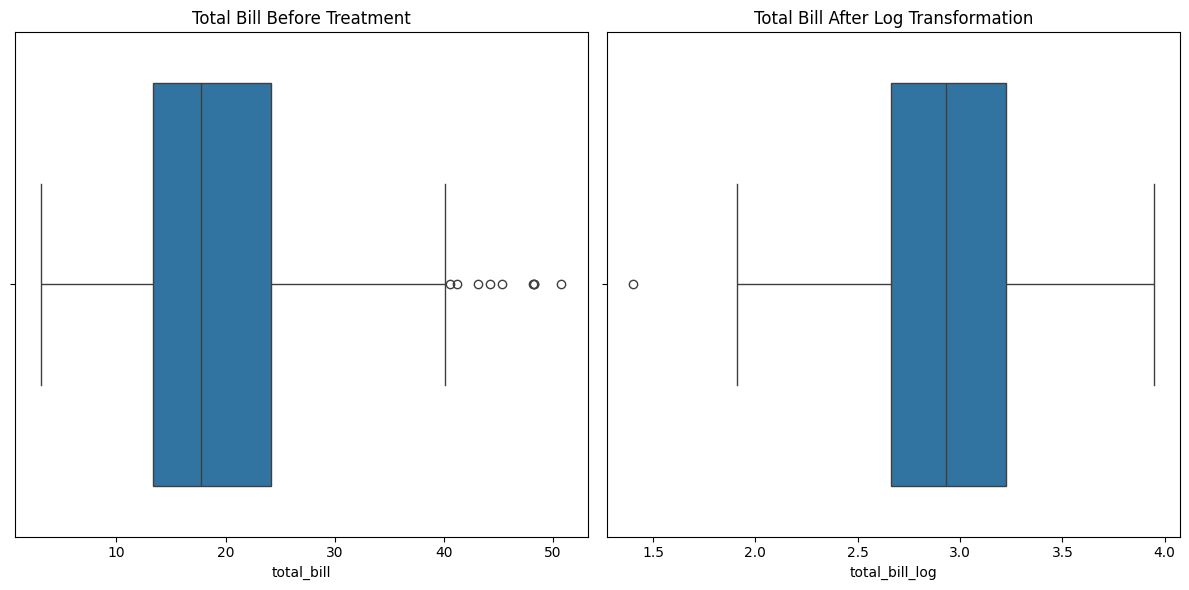

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.boxplot(x=df['total_bill'])
plt.title('Total Bill Before Treatment')

df['total_bill_log'] = np.log1p(df['total_bill'])

plt.subplot(122)
sns.boxplot(x=df['total_bill_log'])
plt.title('Total Bill After Log Transformation')

plt.tight_layout()
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [37]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (244, 8)
Dataset shape after removing outliers: (235, 8)


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [45]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'])
print(df_encoded.sample(5))

     total_bill  tip  size  total_bill_log  sex_Female  sex_Male  smoker_No  \
28        21.70  4.3     2        3.122365       False      True       True   
240       27.18  2.0     2        3.338613        True     False      False   
137       14.15  2.0     2        2.718001        True     False       True   
236       12.60  1.0     2        2.610070       False      True      False   
190       15.69  1.5     2        2.814810       False      True      False   

     smoker_Yes  day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
28        False    False     True    False     False         True       False  
240        True    False     True    False     False         True       False  
137       False    False    False    False      True        False        True  
236        True    False     True    False     False         True       False  
190        True    False    False     True     False         True       False  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [47]:
scaler = MinMaxScaler()
df['total_bill_scaled'] = scaler.fit_transform(df[['total_bill']])

print("Range of original total_bill:", df['total_bill'].max() - df['total_bill'].min())
print("Range of scaled total_bill:", df['total_bill_scaled'].max() - df['total_bill_scaled'].min())

Range of original total_bill: 47.74
Range of scaled total_bill: 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [48]:
tips_df = pd.read_csv('tips.csv')

tips_df_encoded = pd.get_dummies(tips_df, columns=['sex', 'smoker', 'day', 'time'])

y = tips_df_encoded['tip']
X = tips_df_encoded.drop('tip', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (244, 12)
Shape of y: (244,)


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (170, 12)
Shape of X_test: (74, 12)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f"R-squared value on the test data: {r_squared}")

R-squared value on the test data: 0.29309667441267395


### Happy Learning:)